In [1]:
from bs4 import BeautifulSoup
import pandas as pd 
import requests
import urllib.request

In [8]:
url = 'https://www.hanbit.co.kr/academy/books/new_book_list.html'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
req = requests.get(url, headers = header) 
html = req.text

In [9]:
soup = BeautifulSoup(html, 'html.parser')

In [17]:
book_list =soup.select('.info')
len(book_list)

20

In [18]:
title = book_list[0].select_one('.book_tit').string
title

'포르잔 C++ 에센셜'

In [19]:
writer = book_list[0].select_one('.book_writer').string
writer

'Behrouz A. Forouzan , Richard F. Gilberg '

In [21]:
sub_book_list =soup.select('.sub_book_list')

In [37]:
price = sub_book_list[0].select_one('.price').get_text()
price


'32,000원'

In [38]:
#빈리스트를 만든다

In [40]:
titles =[]; writers = []; prices =[]

In [49]:
book_list =soup.select('.sub_book_list')

In [50]:
for book in book_list:
    title = book.select_one('.book_tit').get_text()
    writer = book.select_one('.book_writer').get_text()
    price = book.select_one('.price').get_text()

    titles.append(title)
    writers.append(writer)
    prices.append(price)

In [51]:
newBook = pd.DataFrame({
    'title': titles,
    'writer': writers,
    'price' : prices
})
newBook = newBook.set_index('title')
print(f'새로나온 책')
newBook

새로나온 책


,writer,price
title,,
포르잔 C++ 에센셜,"Behrouz A. Forouzan , Richard F. Gilberg","32,000원"
"IT CookBook, 액세스 2019로 배우는 데이터베이스 기초와 실습",김지연,"28,000원"
포르잔 C++ 바이블,"Behrouz A. Forouzan , Richard F. Gilberg","45,000원"
딥러닝을 위한 선형대수학,Gilbert Strang,"38,000원"
"IT CookBook, 오라클로 배우는 데이터베이스 개론과 실습(2판)","박우창 , 남송휘 , 이현룡","29,000원"
대학을 버려야 대학이 산다,조동성 외 인천대학교 가족 178명,"18,000원"
"IT CookBook, 따라 하면서 배우는 사물인터넷",양재삼,"28,000원"
R로 하는 다변량 데이터 분석 : 이론부터 실무 활용까지,"카와하시 잇코 , 이와마 노리카즈 , 스즈키 마사유키","32,000원"
창의적 공학설계(3판),김은경,"23,000원"


In [52]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

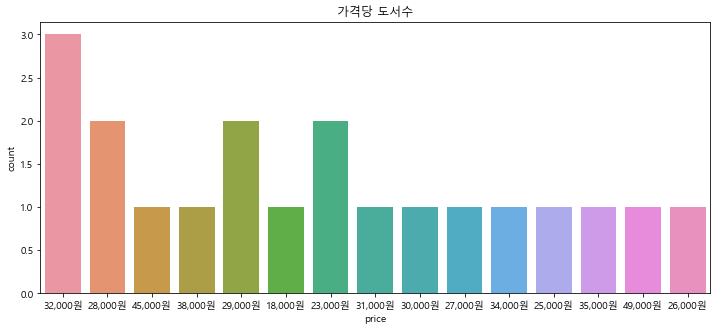

In [64]:
plt.figure(figsize =(12,5))

sns.countplot(x="price", data=newBook)

plt.title("가격당 도서수")
plt.show()